In [16]:
import numpy as np
import matplotlib as m
import matplotlib.pyplot as plt

In [144]:
traj = np.loadtxt('../Pyloric CTRNN Genomes/testtraj.dat')

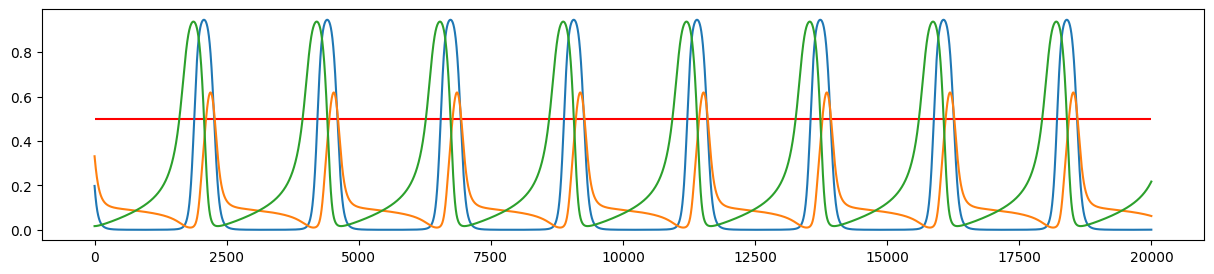

In [145]:
plt.rcParams['figure.figsize'] = (15,3)
plt.hlines(.5,0,len(traj),colors='r')
for i in range(len(traj[0])):
    plt.plot(traj[:,i])

In [9]:
#HIGH RES
# par1min = -16
# par1max = 16
# par1step = .05
# par2min = -16
# par2max = 16
# par2step = .05

# par1min = 0
# par1max = 16
# par1step = .05
# par2min = 0
# par2max = 16
# par2step = .05

# par1min = -10
# par1max = 20
# par1step = .05
# par2min = -20
# par2max = 10
# par2step = .05

#which has no extra for each dimension
# par1res = np.arange(par1min,par1max,par1step)
# par2res = np.arange(par2min,par2max,par2step)

# #REGULAR RES
par1min = -16
par1max = 16
par1step = .1
par2min = -16
par2max = 16
par2step = .1

# # # which goes an extra for each dimension
par1res = np.arange(par1min,par1max+par1step,par1step)
par2res = np.arange(par2min,par2max+par2step,par2step)

In [ ]:
#define a set of colors for use in the figure
viridian = '#277C5E'
xanthous = '#F8AB25'
flame = '#E46A3A'
french_gray = '#BEBFC5'
airforce_blue = '#5F8EB0'


In [140]:
def get_pyloric_slice(indiv,high_res=False):
    if high_res:
        pyloricslice = np.loadtxt('./Specifically Evolved HP mechanisms/Every Circuit/%s/pyloricslice_highres.dat'%indiv)
    else:
        pyloricslice = np.loadtxt('./Specifically Evolved HP mechanisms/Every Circuit/%s/pyloricslice.dat'%indiv)
    pyloricslice = np.swapaxes(pyloricslice,1,0)
    return pyloricslice
def get_res_and_slice(indiv, high_res=False):
    if high_res:
        resolution = np.loadtxt('./Specifically Evolved HP mechanisms/Every Circuit/%s/res_highres.dat'%indiv)
    else:
        resolution = np.loadtxt('./Specifically Evolved HP mechanisms/Every Circuit/%s/res.dat'%indiv)
    pyloricslice = get_pyloric_slice(indiv,high_res)
    par1res = np.linspace(resolution[0,0],resolution[0,1],len(pyloricslice))
    par2res = np.linspace(resolution[1,0],resolution[1,1],len(pyloricslice[0]))
    return par1res, par2res, pyloricslice

def get_outline(indiv,cutoff,high_res=False):
    pyloricslice = get_pyloric_slice(indiv,high_res)
    borderlist_left = []
    borderlist_right = []
    for i in range(len(pyloricslice)):
        for j in range(2,len(pyloricslice[0])-1):
            if (pyloricslice[i,j-2] < cutoff and pyloricslice[i,j-1] < cutoff and pyloricslice[i,j]>=cutoff and pyloricslice[i,j+1]>=cutoff):
                borderlist_left.append([par1res[j-1],par2res[i]])
                # print('left @ (%s,%s):'%(par2res[j],par1res[i]),pyloricslice[i,j-1],' right:',pyloricslice[i,j])
            if (pyloricslice[i,j-2] >= cutoff and pyloricslice[i,j-1] >= cutoff and pyloricslice[i,j]<cutoff and pyloricslice[i,j+1]<cutoff):
                borderlist_right.append([par1res[j],par2res[i]])
    return [borderlist_left,borderlist_right[::-1]]
def plot_outline(indiv,cutoff,colorstring,high_res=False,ax=None):
    outline = get_outline(indiv,cutoff,high_res)
    for border in range(len(outline)):
        if len(outline[border])!=0:
            test = outline[border]
            test.append(outline[(border+1)%(len(outline))][0])
            test = np.array(test)
            if ax==None:
                plt.plot(test[:,0],test[:,1],color=colorstring)
            else:
                ax.plot(test[:,0],test[:,1],color=colorstring,linewidth=1)

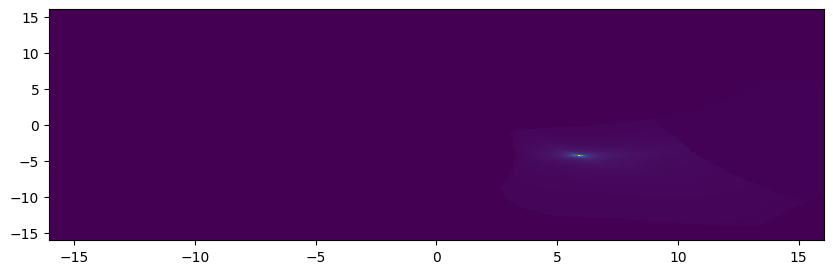

In [143]:
par1res, par2res, pyloric = get_res_and_slice(99,False)
plt.pcolormesh(par1res,par2res,pyloric)

In [47]:
par1min = -5
par1max = 25
par1step = .05
par2min = -20
par2max = 10
par2step = .05

# # # which goes an extra for each dimension
par1res = np.arange(par1min,par1max,par1step)
par2res = np.arange(par2min,par2max,par2step)

pyloric = get_pyloric_slice(99,True)

In [ ]:
greys = ['#C8C8C8','#BEBEBE','#D3D3D3','#DCDCDC','#E8E8E8','#F5F5F5','#FFFFFF']
rainbow = ['r','orange','yellow','green','blue','purple']
print(rainbow[::-1])

['white', 'white', 'blue', 'green', 'yellow', 'orange', 'r']


In [110]:
#define points from each region of interest from which to pull trajectories
evolved_sln = [5.84688, -4.23992]
less_good_pyloric = [10,-10]
misordered1 = [17,-4]
misordered2 = [4,-10]
two_osc = [2.5,-12]
one_osc = [22.5,7]
nonoscillatory = [7,1]
pts = np.array([evolved_sln,less_good_pyloric,misordered1,misordered2,two_osc,one_osc,nonoscillatory])

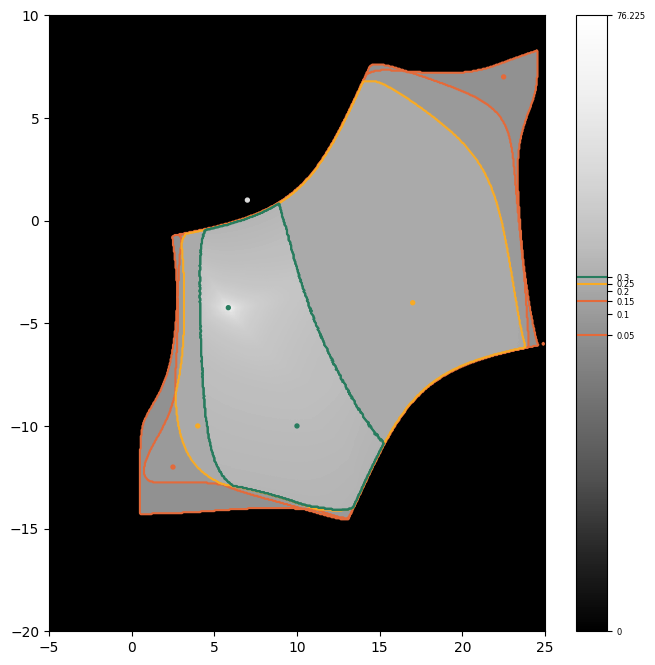

In [138]:
plt.rcParams['figure.figsize'] = (8,8)
fig, ax= plt.subplots()
plt.xlim(par1min,par1max)
plt.ylim(par2min,par2max)
pyloric = get_pyloric_slice(99,True)
plt.contour(par1res,par2res,pyloric,levels=[0,0.05,0.15,0.25,0.3],colors=[flame,flame,xanthous,viridian,viridian])
dax = ax.pcolormesh(par1res,par2res,pyloric,cmap='Greys_r', norm=m.colors.PowerNorm(gamma=0.1))
cbar = fig.colorbar(dax,ticks=[0,0.05,0.1,0.15,0.20,0.25,0.3,pyloric.max()])
cbar.ax.hlines([0.05,0.15,0.25,0.3],-1,1,colors=[flame,flame,xanthous,viridian])
cbar.set_ticklabels([0,0.05,0.1,0.15,0.20,0.25,0.3,pyloric.max()],fontsize=6)
plt.scatter(pts[:,0],pts[:,1],c=[viridian,viridian,xanthous,xanthous,flame,flame,'#DCDCDC'],s=8)

In [106]:
evolved_sln_traj = np.loadtxt('./Specifically Evolved HP mechanisms/Every Circuit/99/Other Plane Trajectories/evolved.dat')
less_good_pyloric_traj = np.loadtxt('./Specifically Evolved HP mechanisms/Every Circuit/99/Other Plane Trajectories/lessgood.dat')
misordered1_traj = np.loadtxt('./Specifically Evolved HP mechanisms/Every Circuit/99/Other Plane Trajectories/misordered1.dat')
misordered2_traj = np.loadtxt('./Specifically Evolved HP mechanisms/Every Circuit/99/Other Plane Trajectories/misordered2.dat')
two_osc_traj = np.loadtxt('./Specifically Evolved HP mechanisms/Every Circuit/99/Other Plane Trajectories/twoosc.dat')
one_osc_traj = np.loadtxt('./Specifically Evolved HP mechanisms/Every Circuit/99/Other Plane Trajectories/oneosc.dat')
nonoscillatory_traj = np.loadtxt('./Specifically Evolved HP mechanisms/Every Circuit/99/Other Plane Trajectories/nonosc.dat')

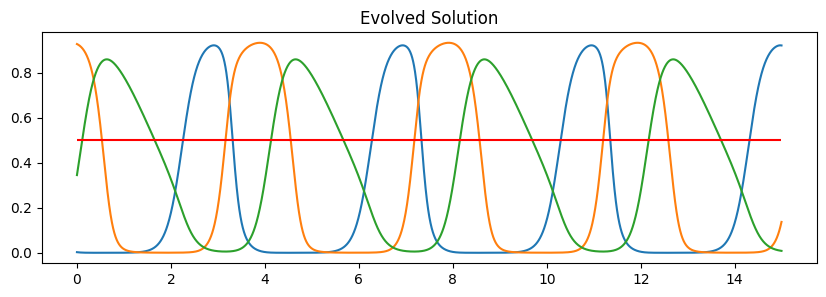

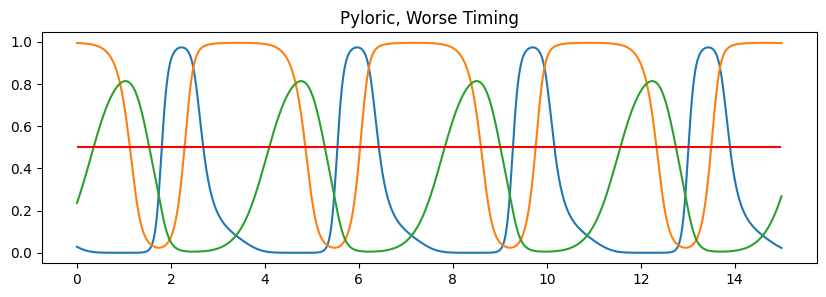

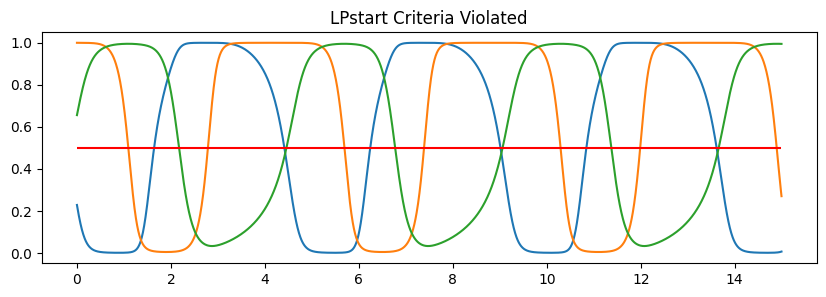

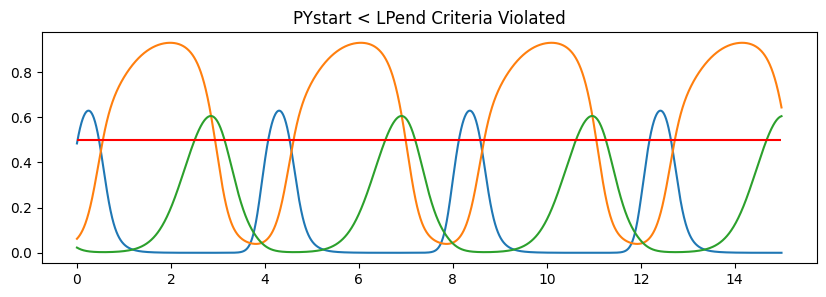

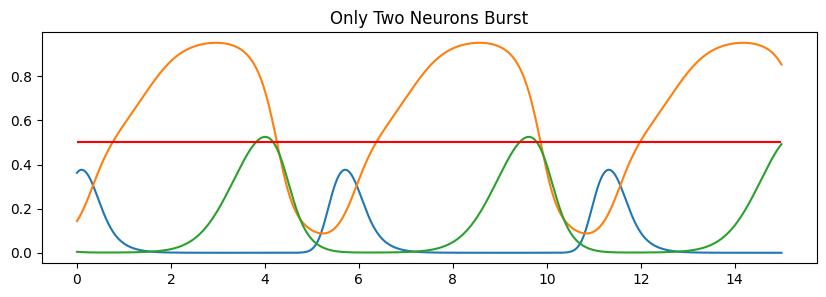

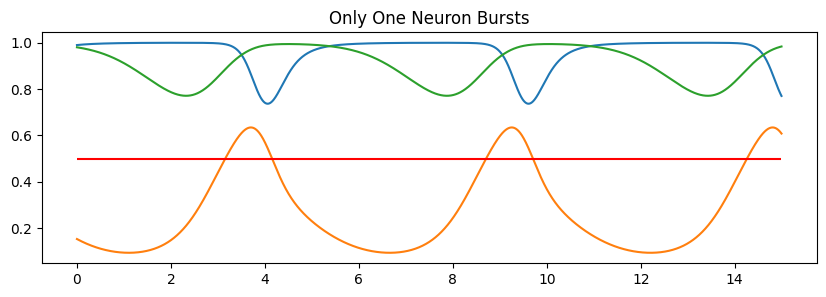

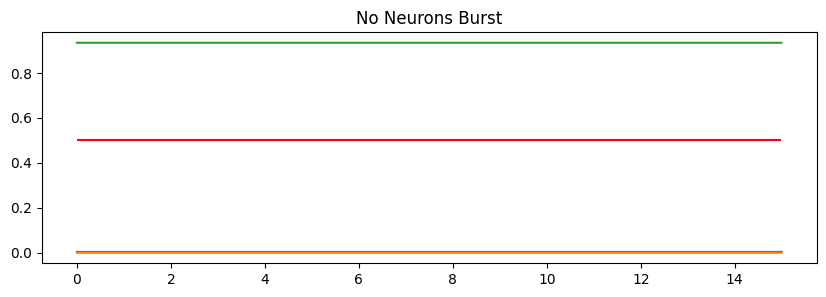

In [ ]:
trajs = np.array([evolved_sln_traj,less_good_pyloric_traj,misordered1_traj,misordered2_traj,two_osc_traj,one_osc_traj,nonoscillatory_traj])
titles = ['Evolved Solution','Pyloric, Worse Timing','LPstart Criteria Violated','PYstart < LPend Criteria Violated','Only Two Neurons Burst','Only One Neuron Bursts','No Neurons Burst']

end_time = 15
time = np.arange(0,end_time,0.005)
trajs = trajs[:,0:len(time)]

plt.rcParams['figure.figsize']=(10,3)

k = 0
for traj in trajs:
    for i in range(len(traj[0])):
        plt.plot(time,traj[:,i])
    m.patches.Patch(edgecolor='r')
    plt.hlines(.5,time[0],time[-1],)
    plt.title(titles[k])
    k+=1
    plt.show()